In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('datasetnew.csv', low_memory=False)
data.head()

,ID,name,main_category,sub_category,ratings,discount_price,rand,Date,Month,Country,Gender,Age Group
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,32999.0,17,7/9/2022,7,Turkey,Men,31-40
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,46490.0,95,7/26/2022,7,Germany,Men,<12-20
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,34490.0,13,12/23/2022,12,Italy,Women,41-50
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,37990.0,59,12/31/2022,12,Austria,Women,31-40
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,34490.0,31,12/4/2022,12,France,Men,31-40


In [3]:
data = data.drop(['ID','name','sub_category','ratings','discount_price','rand','Month','Country','Gender','Age Group'], axis =1)

In [4]:
data.head()

,main_category,Date
0,appliances,7/9/2022
1,appliances,7/26/2022
2,appliances,12/23/2022
3,appliances,12/31/2022
4,appliances,12/4/2022


In [5]:
df = data.copy()

In [6]:
def encode_dates(df,column):
    df = df.copy()
    
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    #df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    
    return df


In [7]:
def preprocess_inputs(df):
    df = df.copy()

    df = encode_dates(df, column = 'Date')
    
    return df

In [8]:
df = preprocess_inputs(df)

In [9]:
df.head()

,main_category,Date_year,Date_month
0,appliances,2022,7
1,appliances,2022,7
2,appliances,2022,12
3,appliances,2022,12
4,appliances,2022,12


In [10]:
data = df.copy()

In [11]:
combination_counts = data.groupby(data.columns.tolist(), as_index=False).size()

# Rename the 'size' column to 'Count'
combination_counts.rename(columns={'size': 'Count'}, inplace=True)

# Merge the count information back into the original DataFrame
data = data.merge(combination_counts, on=data.columns.tolist(), how='left')

data = data.drop_duplicates()

data

,main_category,Date_year,Date_month,Count
0,appliances,2022,7,731
2,appliances,2022,12,5059
8,appliances,2022,2,251
21,appliances,2022,9,674
23,appliances,2022,3,578
...,...,...,...,...
147527,men's clothing,2021,11,1096
147534,men's clothing,2021,10,332
147542,men's clothing,2021,6,502
147543,men's clothing,2021,8,1411


In [12]:
data.describe()

,Date_year,Date_month,Count
count,184.000000,184.000000,184.000000
mean,2021.521739,6.391304,1297.836957
std,0.500890,3.495372,1974.773124
min,2021.000000,1.000000,50.000000
25%,2021.000000,3.000000,268.000000
50%,2022.000000,6.000000,598.000000
75%,2022.000000,10.000000,1356.000000
max,2022.000000,12.000000,11628.000000


In [13]:
encoder = LabelEncoder()

In [14]:
data['main_category'] = encoder.fit_transform(data['main_category'])

In [15]:
data.head()

,main_category,Date_year,Date_month,Count
0,1,2022,7,731
2,1,2022,12,5059
8,1,2022,2,251
21,1,2022,9,674
23,1,2022,3,578


In [16]:
X = data.drop(columns='Count', axis=1)
Y = data['Count']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [20]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.9999893860219896


In [21]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.786281313269289


In [36]:
user_main_category = 'appliances'
user_date_year = 2024
user_date_month = 11

# Encode user input main_category using the same encoder
encoded_main_category = encoder.transform([user_main_category])

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'main_category': encoded_main_category,
    'Date_year': [user_date_year],
    'Date_month': [user_date_month]
})

# Make predictions using the trained regressor
predicted_count = regressor.predict(user_input_df)

print("Predicted Count:", predicted_count)

Predicted Count: [659.604]


In [ ]:
user_main_categories = ['grocery & gourmet foods', 'appliances', 'accessories', 
                        'beauty & health',"men's clothing",'sports & fitness','toys & baby products',"women's clothing"]

In [41]:
import pickle
with open('demand_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

with open('demand_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

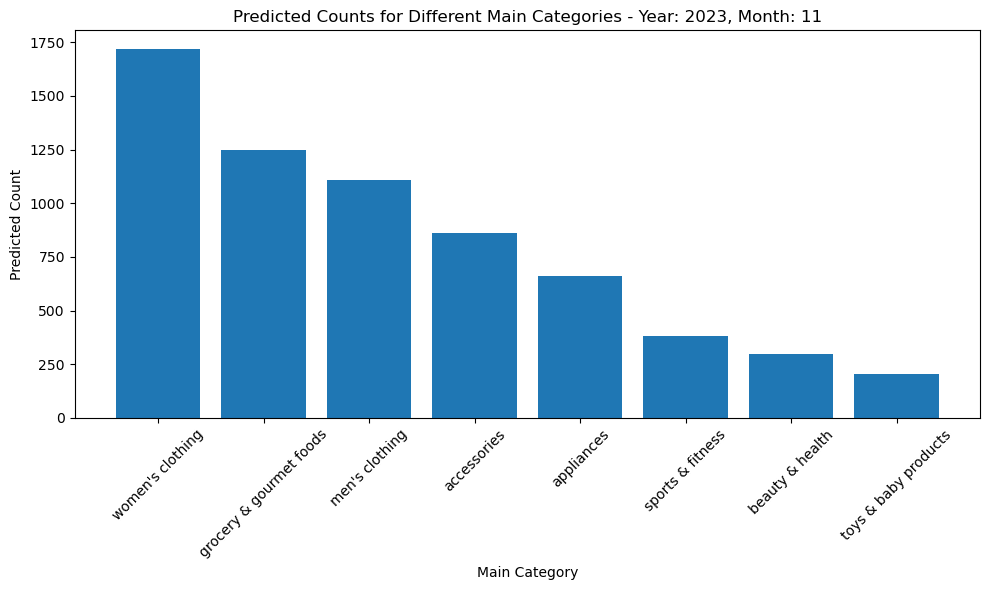

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the user input
user_date_year = 2023
user_date_month = 11

# Create an array of user_main_categories (example list, replace with your actual data)
user_main_categories = ['grocery & gourmet foods', 'appliances', 'accessories', 
                        'beauty & health',"men's clothing",'sports & fitness','toys & baby products',"women's clothing"]

# Create a dictionary to hold predicted counts for each main category
predicted_counts = {main_category: [] for main_category in user_main_categories}

# Loop through each main category
for main_category in user_main_categories:
    encoded_main_category = encoder.transform([main_category])
    
    user_input_df = pd.DataFrame({
        'main_category': encoded_main_category,
        'Date_year': [user_date_year],
        'Date_month': [user_date_month]
    })

    # Make predictions using the trained regressor
    predicted_count = regressor.predict(user_input_df)
    
    predicted_counts[main_category].append(predicted_count[0])

# Sort main categories based on predicted counts in descending order
sorted_main_categories = sorted(user_main_categories, key=lambda x: predicted_counts[x][0], reverse=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(sorted_main_categories))

# Plot the bar chart for the specific month
plt.bar(x, [predicted_counts[main_category][0] for main_category in sorted_main_categories])
plt.title('Predicted Counts for Different Main Categories - Year: {}, Month: {}'.format(user_date_year, user_date_month))
plt.xlabel('Main Category')
plt.ylabel('Predicted Count')
plt.xticks(x, sorted_main_categories, rotation=45)
plt.tight_layout()
plt.show()
